In [1]:
import matplotlib.pyplot as plt
import numpy as np
import population_average as pop
import read_mist_models
import wind_mass_losses as wml
from scipy.integrate import cumtrapz

/Users/lachlanlancaster/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
iso = read_mist_models.ISO("mist_iso_theory/MIST_v1.2_vvcrit0.0_full_isos/MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.0_full.iso")
ages = [round(x,2) for x in np.array(iso.ages)[np.where(np.array(iso.ages) < 7.1)]]

Reading in: mist_iso_theory/MIST_v1.2_vvcrit0.0_full_isos/MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.0_full.iso


In [10]:
m50_list = pop.gen_mass_samp(50,3000)
me2_list = pop.gen_mass_samp(1e2,3000)
me3_list = pop.gen_mass_samp(1e3,3000)
me4_list = pop.gen_mass_samp(1e4,3000)

[] 126.84851820089708 50
[] 147.38222953105503 50
[] 131.6528251484885 50
[] 315.7304394341967 100.0


In [11]:
(Mdot50_vink_25,Mdot50_vink,Mdot50_vink_75) = pop.get_mdot_evol(m50_list, iso, ages, wml.mdot_vink_ostar)
(Mdote2_vink_25,Mdote2_vink,Mdote2_vink_75) = pop.get_mdot_evol(me2_list, iso, ages, wml.mdot_vink_ostar)
(Mdote3_vink_25,Mdote3_vink,Mdote3_vink_75) = pop.get_mdot_evol(me3_list, iso, ages, wml.mdot_vink_ostar)
(Mdote4_vink_25,Mdote4_vink,Mdote4_vink_75) = pop.get_mdot_evol(me4_list, iso, ages, wml.mdot_vink_ostar)

(Mdot50_vinkG_25,Mdot50_vinkG,Mdot50_vinkG_75) = pop.get_mdot_evol(m50_list, iso, ages, wml.mdot_vink_ostar_useGamma)
(Mdote2_vinkG_25,Mdote2_vinkG,Mdote2_vinkG_75) = pop.get_mdot_evol(me2_list, iso, ages, wml.mdot_vink_ostar_useGamma)
(Mdote3_vinkG_25,Mdote3_vinkG,Mdote3_vinkG_75) = pop.get_mdot_evol(me3_list, iso, ages, wml.mdot_vink_ostar_useGamma)
(Mdote4_vinkG_25,Mdote4_vinkG,Mdote4_vinkG_75) = pop.get_mdot_evol(me4_list, iso, ages, wml.mdot_vink_ostar_useGamma)

In [13]:
(Mdot50_VS21_25,Mdot50_VS21,Mdot50_VS21_75) = pop.get_mdot_evol(m50_list, iso, ages, wml.mdot_VS21_ostar)
(Mdote2_VS21_25,Mdote2_VS21,Mdote2_VS21_75) = pop.get_mdot_evol(me2_list, iso, ages, wml.mdot_VS21_ostar)
(Mdote3_VS21_25,Mdote3_VS21,Mdote3_VS21_75) = pop.get_mdot_evol(me3_list, iso, ages, wml.mdot_VS21_ostar)
(Mdote4_VS21_25,Mdote4_VS21,Mdote4_VS21_75) = pop.get_mdot_evol(me4_list, iso, ages, wml.mdot_VS21_ostar)

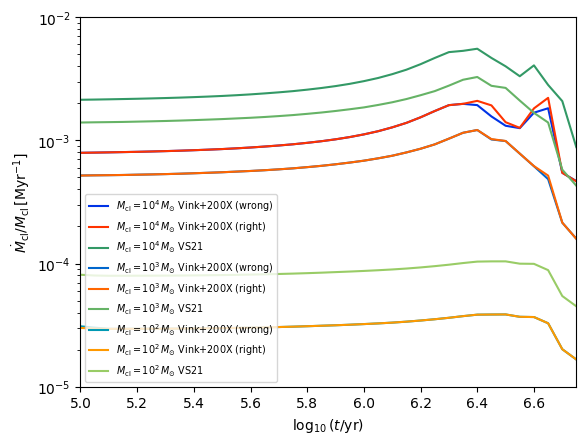

In [15]:
fig, axes = plt.subplots(1, 1)#, figsize=(3.37, 3.37*.8))
(ax1) = axes

ax1.plot(ages, 1e6*Mdote4_vink/1e4,  c=plt.cm.winter(0.2), label=r"$M_{\rm cl} = 10^4\,M_{\odot}$ Vink+200X (wrong)")
ax1.plot(ages, 1e6*Mdote4_vinkG/1e4, c=plt.cm.autumn(0.2), label=r"$M_{\rm cl} = 10^4\,M_{\odot}$ Vink+200X (right)")
ax1.plot(ages, 1e6*Mdote4_VS21/1e4,  c=plt.cm.summer(0.2), label=r"$M_{\rm cl} = 10^4\,M_{\odot}$ VS21")

ax1.plot(ages, 1e6*Mdote3_vink/1e3,  c=plt.cm.winter(0.4), label=r"$M_{\rm cl} = 10^3\,M_{\odot}$ Vink+200X (wrong)")
ax1.plot(ages, 1e6*Mdote3_vinkG/1e3, c=plt.cm.autumn(0.4), label=r"$M_{\rm cl} = 10^3\,M_{\odot}$ Vink+200X (right)")
ax1.plot(ages, 1e6*Mdote3_VS21/1e3,  c=plt.cm.summer(0.4), label=r"$M_{\rm cl} = 10^3\,M_{\odot}$ VS21")

ax1.plot(ages, 1e6*Mdote2_vink/1e2,  c=plt.cm.winter(0.6), label=r"$M_{\rm cl} = 10^2\,M_{\odot}$ Vink+200X (wrong)")
ax1.plot(ages, 1e6*Mdote2_vinkG/1e2, c=plt.cm.autumn(0.6), label=r"$M_{\rm cl} = 10^2\,M_{\odot}$ Vink+200X (right)")
ax1.plot(ages, 1e6*Mdote2_VS21/1e2,  c=plt.cm.summer(0.6), label=r"$M_{\rm cl} = 10^2\,M_{\odot}$ VS21")

ax1.set_yscale("log")
ax1.set_ylim(1e-5,1e-2)
ax1.set_xlim(5.0,6.75)
ax1.set_ylabel(r"$\dot{M}_{\rm cl}/M_{\rm cl} \, [{\rm Myr}^{-1}]$")
ax1.set_xlabel(r"$\log_{10}(t/{\rm yr})$")
ax1.legend(ncols=1,fontsize="x-small")
plt.savefig("figures/wind_mdot_comp.png")

In [4]:
(age_arr,cumMSN50,cumMW50) = pop.gen_MSN(m50_list, iso)
(age_arr,cumMSNe2,cumMWe2) = pop.gen_MSN(me2_list, iso)
(age_arr,cumMSNe3,cumMWe3) = pop.gen_MSN(me3_list, iso)
(age_arr,cumMSNe4,cumMWe4) = pop.gen_MSN(me4_list, iso)

(NSN50_25,NSN50,NSN50_75) = pop.get_NSN_evol(m50_list, iso, age_arr)
(NSNe2_25,NSNe2,NSNe2_75) = pop.get_NSN_evol(me2_list, iso, age_arr)
(NSNe3_25,NSNe3,NSNe3_75) = pop.get_NSN_evol(me3_list, iso, age_arr)
(NSNe4_25,NSNe4,NSNe4_75) = pop.get_NSN_evol(me4_list, iso, age_arr)

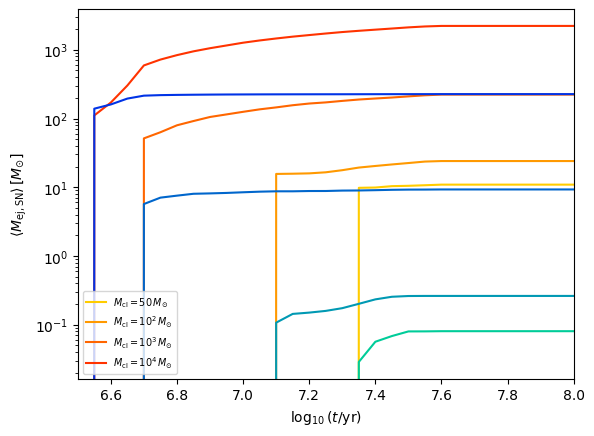

In [8]:
fig, axes = plt.subplots(1, 1)#, figsize=(3.37, 3.37*.8))
(ax1) = axes

ax1.plot(age_arr,cumMSN50,c=plt.cm.autumn(0.8),label=r"$M_{\rm cl} = 50\, M_{\odot}$")
ax1.plot(age_arr,cumMSNe2,c=plt.cm.autumn(0.6),label=r"$M_{\rm cl} = 10^2\, M_{\odot}$")
ax1.plot(age_arr,cumMSNe3,c=plt.cm.autumn(0.4),label=r"$M_{\rm cl} = 10^3\, M_{\odot}$")
ax1.plot(age_arr,cumMSNe4,c=plt.cm.autumn(0.2),label=r"$M_{\rm cl} = 10^4\, M_{\odot}$")

ax1.plot(age_arr,cumMW50,c=plt.cm.winter(0.8))
ax1.plot(age_arr,cumMWe2,c=plt.cm.winter(0.6))
ax1.plot(age_arr,cumMWe3,c=plt.cm.winter(0.4))
ax1.plot(age_arr,cumMWe4,c=plt.cm.winter(0.2))


ax1.set_yscale("log")
#ax1.set_ylim(1e-4,1e-1)
ax1.set_xlim(6.5,8)
ax1.set_ylabel(r"$\left\langle M_{\rm ej, SN} \right\rangle \, [ M_{\odot}]$")
ax1.set_xlabel(r"$\log_{10}(t/{\rm yr})$")
ax1.legend(ncols=1,fontsize="x-small")
plt.savefig("figures/cumulative_MSN.png")

/var/folders/fh/t3tp4rc100n0pqqv4twl8dn40000gn/T/ipykernel_76470/1406944908.py:4: RuntimeWarning: invalid value encountered in divide
  ax1.plot(age_arr,cumMSN50/NSN50,c=plt.cm.autumn(0.8),label=r"$M_{\rm cl} = 50\, M_{\odot}$")
/var/folders/fh/t3tp4rc100n0pqqv4twl8dn40000gn/T/ipykernel_76470/1406944908.py:5: RuntimeWarning: invalid value encountered in divide
  ax1.plot(age_arr,cumMSNe2/NSNe2,c=plt.cm.autumn(0.6),label=r"$M_{\rm cl} = 10^2\, M_{\odot}$")
/var/folders/fh/t3tp4rc100n0pqqv4twl8dn40000gn/T/ipykernel_76470/1406944908.py:6: RuntimeWarning: invalid value encountered in divide
  ax1.plot(age_arr,cumMSNe3/NSNe3,c=plt.cm.autumn(0.4),label=r"$M_{\rm cl} = 10^3\, M_{\odot}$")
/var/folders/fh/t3tp4rc100n0pqqv4twl8dn40000gn/T/ipykernel_76470/1406944908.py:7: RuntimeWarning: invalid value encountered in divide
  ax1.plot(age_arr,cumMSNe4/NSNe4,c=plt.cm.autumn(0.2),label=r"$M_{\rm cl} = 10^4\, M_{\odot}$")
/var/folders/fh/t3tp4rc100n0pqqv4twl8dn40000gn/T/ipykernel_76470/1406944908.py

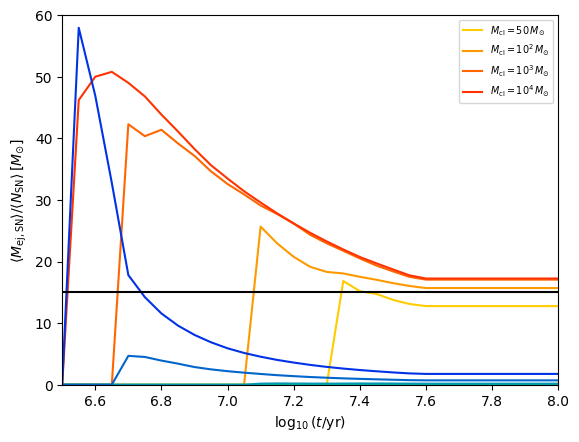

In [9]:
fig, axes = plt.subplots(1, 1)#, figsize=(3.37, 3.37*.8))
(ax1) = axes

ax1.plot(age_arr,cumMSN50/NSN50,c=plt.cm.autumn(0.8),label=r"$M_{\rm cl} = 50\, M_{\odot}$")
ax1.plot(age_arr,cumMSNe2/NSNe2,c=plt.cm.autumn(0.6),label=r"$M_{\rm cl} = 10^2\, M_{\odot}$")
ax1.plot(age_arr,cumMSNe3/NSNe3,c=plt.cm.autumn(0.4),label=r"$M_{\rm cl} = 10^3\, M_{\odot}$")
ax1.plot(age_arr,cumMSNe4/NSNe4,c=plt.cm.autumn(0.2),label=r"$M_{\rm cl} = 10^4\, M_{\odot}$")

ax1.plot(age_arr,cumMW50/NSN50,c=plt.cm.winter(0.8))
ax1.plot(age_arr,cumMWe2/NSNe2,c=plt.cm.winter(0.6))
ax1.plot(age_arr,cumMWe3/NSNe3,c=plt.cm.winter(0.4))
ax1.plot(age_arr,cumMWe4/NSNe4,c=plt.cm.winter(0.2))


ax1.axhline(y=15,c="k")

#ax1.set_yscale("log")
ax1.set_ylim(0,60)
ax1.set_xlim(6.5,8)
ax1.set_ylabel(r"$\left\langle M_{\rm ej, SN} \right\rangle/\left\langle N_{\rm SN}\right\rangle \, [ M_{\odot}]$")
ax1.set_xlabel(r"$\log_{10}(t/{\rm yr})$")
ax1.legend(ncols=1,fontsize="x-small")

plt.savefig("figures/cumulative_MSN_perSN.png")

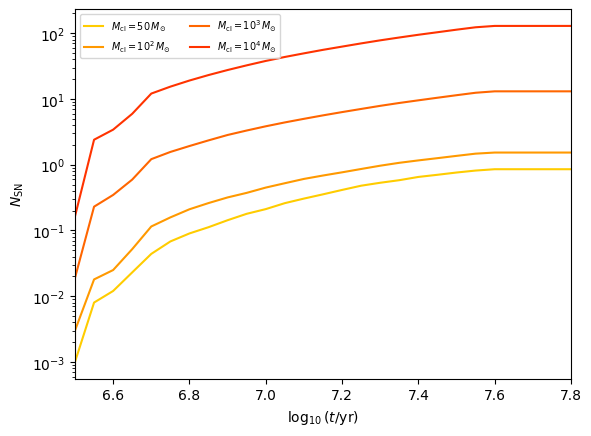

In [10]:
fig, axes = plt.subplots(1, 1)#, figsize=(3.37, 3.37*.8))
(ax1) = axes

ax1.plot(age_arr,NSN50,c=plt.cm.autumn(0.8),label=r"$M_{\rm cl} = 50\, M_{\odot}$")
ax1.plot(age_arr,NSNe2,c=plt.cm.autumn(0.6),label=r"$M_{\rm cl} = 10^2\, M_{\odot}$")
ax1.plot(age_arr,NSNe3,c=plt.cm.autumn(0.4),label=r"$M_{\rm cl} = 10^3\, M_{\odot}$")
ax1.plot(age_arr,NSNe4,c=plt.cm.autumn(0.2),label=r"$M_{\rm cl} = 10^4\, M_{\odot}$")


ax1.set_yscale("log")
#ax1.set_ylim(5e-6,1)
ax1.set_xlim(6.5,7.8)
ax1.set_ylabel(r"$N_{\rm SN}$")
ax1.set_xlabel(r"$\log_{10}(t/{\rm yr})$")
ax1.legend(ncols=2,fontsize="x-small")

In [ ]:
(Mdot50_vink_25,Mdot50_vink,Mdot50_vink_75) = pop.get_mdot_evol(m50_list, iso, ages, wml.mdot_vink_ostar)
(Mdote2_vink_25,Mdote2_vink,Mdote2_vink_75) = pop.get_mdot_evol(me2_list, iso, ages, wml.mdot_vink_ostar)
(Mdote3_vink_25,Mdote3_vink,Mdote3_vink_75) = pop.get_mdot_evol(me3_list, iso, ages, wml.mdot_vink_ostar)
(Mdote4_vink_25,Mdote4_vink,Mdote4_vink_75) = pop.get_mdot_evol(me4_list, iso, ages, wml.mdot_vink_ostar)

(Mdot50_VS21_25,Mdot50_VS21,Mdot50_VS21_75) = pop.get_mdot_evol(m50_list, iso, ages, wml.mdot_VS21_ostar)
(Mdote2_VS21_25,Mdote2_VS21,Mdote2_VS21_75) = pop.get_mdot_evol(me2_list, iso, ages, wml.mdot_VS21_ostar)
(Mdote3_VS21_25,Mdote3_VS21,Mdote3_VS21_75) = pop.get_mdot_evol(me3_list, iso, ages, wml.mdot_VS21_ostar)
(Mdote4_VS21_25,Mdote4_VS21,Mdote4_VS21_75) = pop.get_mdot_evol(me4_list, iso, ages, wml.mdot_VS21_ostar)

(Mdot50_sb99_25,Mdot50_sb99,Mdot50_sb99_75) = pop.get_mdot_evol(m50_list, iso, ages, wml.mdot_sb99_ostar)
(Mdote2_sb99_25,Mdote2_sb99,Mdote2_sb99_75) = pop.get_mdot_evol(me2_list, iso, ages, wml.mdot_sb99_ostar)
(Mdote3_sb99_25,Mdote3_sb99,Mdote3_sb99_75) = pop.get_mdot_evol(me3_list, iso, ages, wml.mdot_sb99_ostar)
(Mdote4_sb99_25,Mdote4_sb99,Mdote4_sb99_75) = pop.get_mdot_evol(me4_list, iso, ages, wml.mdot_sb99_ostar)

(Mdot50_BJKD_25,Mdot50_BJKD,Mdot50_BJKD_75) = pop.get_mdot_evol(m50_list, iso, ages, wml.mdot_BJKD_ostar)
(Mdote2_BJKD_25,Mdote2_BJKD,Mdote2_BJKD_75) = pop.get_mdot_evol(me2_list, iso, ages, wml.mdot_BJKD_ostar)
(Mdote3_BJKD_25,Mdote3_BJKD,Mdote3_BJKD_75) = pop.get_mdot_evol(me3_list, iso, ages, wml.mdot_BJKD_ostar)
(Mdote4_BJKD_25,Mdote4_BJKD,Mdote4_BJKD_75) = pop.get_mdot_evol(me4_list, iso, ages, wml.mdot_BJKD_ostar)

In [12]:
(Mdot50_NL00_25,Mdot50_NL00,Mdot50_NL00_75) = pop.get_mdot_evol(m50_list, iso, ages, wml.mdot_NL00_WR,op="WR")
(Mdote2_NL00_25,Mdote2_NL00,Mdote2_NL00_75) = pop.get_mdot_evol(me2_list, iso, ages, wml.mdot_NL00_WR,op="WR")
(Mdote3_NL00_25,Mdote3_NL00,Mdote3_NL00_75) = pop.get_mdot_evol(me3_list, iso, ages, wml.mdot_NL00_WR,op="WR")
(Mdote4_NL00_25,Mdote4_NL00,Mdote4_NL00_75) = pop.get_mdot_evol(me4_list, iso, ages, wml.mdot_NL00_WR,op="WR")

(Mdot50_SV20_25,Mdot50_SV20,Mdot50_SV20_75) = pop.get_mdot_evol(m50_list, iso, ages, wml.mdot_SV20_WR,op="WR")
(Mdote2_SV20_25,Mdote2_SV20,Mdote2_SV20_75) = pop.get_mdot_evol(me2_list, iso, ages, wml.mdot_SV20_WR,op="WR")
(Mdote3_SV20_25,Mdote3_SV20,Mdote3_SV20_75) = pop.get_mdot_evol(me3_list, iso, ages, wml.mdot_SV20_WR,op="WR")
(Mdote4_SV20_25,Mdote4_SV20,Mdote4_SV20_75) = pop.get_mdot_evol(me4_list, iso, ages, wml.mdot_SV20_WR,op="WR")

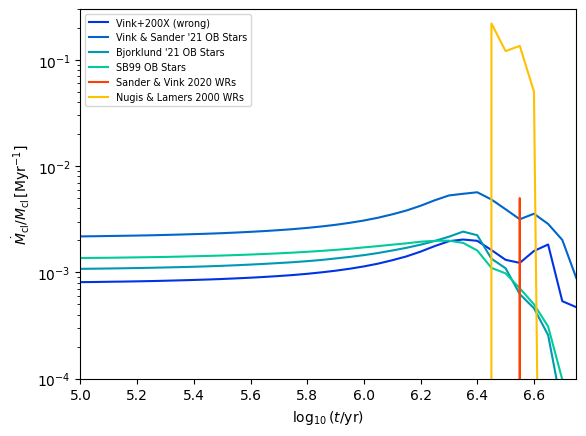

In [ ]:
fig, axes = plt.subplots(1, 1)#, figsize=(3.37, 3.37*.8))
(ax1) = axes

ax1.plot(ages,1e6*Mdote4_vink/1e4,c=plt.cm.winter(0.2),label=r"Vink+200X (wrong)")
ax1.plot(ages,1e6*Mdote4_VS21/1e4,c=plt.cm.winter(0.4),label=r"Vink & Sander '21 OB Stars")
ax1.plot(ages,1e6*Mdote4_BJKD/1e4,c=plt.cm.winter(0.6),label=r"Bjorklund '21 OB Stars")
ax1.plot(ages,1e6*Mdote4_sb99/1e4,c=plt.cm.winter(0.8),label=r"SB99 OB Stars")

ax1.plot(ages,1e6*Mdote4_SV20/1e4,c=plt.cm.autumn(0.25),label=r"Sander & Vink 2020 WRs")
ax1.plot(ages,1e6*Mdote4_NL00/1e4,c=plt.cm.autumn(0.75),label=r"Nugis & Lamers 2000 WRs")

ax1.set_yscale("log")
ax1.set_ylim(1e-4,3e-1)
ax1.set_xlim(5.0,6.75)
ax1.set_ylabel(r"$\dot{M}_{\rm cl}/M_{\rm cl} \, [ {\rm Myr}^{-1}]$")
ax1.set_xlabel(r"$\log_{10}(t/{\rm yr})$")
ax1.legend(ncols=1,fontsize="x-small")
plt.savefig("figures/wind_mdot_comp.png")

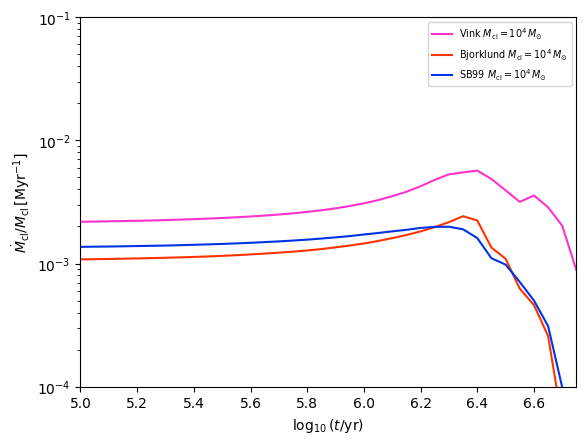

In [19]:
fig, axes = plt.subplots(1, 1)#, figsize=(3.37, 3.37*.8))
(ax1) = axes

#ax1.plot(ages,1e6*Mdot50_VS21/5e1,c=plt.cm.spring(0.8),label=r"Vink $M_{\rm cl} = 50\, M_{\odot}$")
#ax1.plot(ages,1e6*Mdote2_VS21/1e2,c=plt.cm.spring(0.6),label=r"Vink $M_{\rm cl} = 10^2\, M_{\odot}$")
#ax1.plot(ages,1e6*Mdote3_VS21/1e3,c=plt.cm.spring(0.4),label=r"Vink $M_{\rm cl} = 10^3\, M_{\odot}$")
ax1.plot(ages,1e6*Mdote4_VS21/1e4,c=plt.cm.spring(0.2),label=r"Vink $M_{\rm cl} = 10^4\, M_{\odot}$")

#ax1.plot(ages,1e6*Mdot50_BJKD/5e1,c=plt.cm.autumn(0.8),label=r"Bjorklund $M_{\rm cl} = 50\, M_{\odot}$")
#ax1.plot(ages,1e6*Mdote2_BJKD/1e2,c=plt.cm.autumn(0.6),label=r"Bjorklund $M_{\rm cl} = 10^2\, M_{\odot}$")
#ax1.plot(ages,1e6*Mdote3_BJKD/1e3,c=plt.cm.autumn(0.4),label=r"Bjorklund $M_{\rm cl} = 10^3\, M_{\odot}$")
ax1.plot(ages,1e6*Mdote4_BJKD/1e4,c=plt.cm.autumn(0.2),label=r"Bjorklund $M_{\rm cl} = 10^4\, M_{\odot}$")

#ax1.plot(ages,1e6*Mdot50_sb99/5e1,c=plt.cm.winter(0.8),label=r"SB99 $M_{\rm cl} = 50\, M_{\odot}$")
#ax1.plot(ages,1e6*Mdote2_sb99/1e2,c=plt.cm.winter(0.6),label=r"SB99 $M_{\rm cl} = 10^2\, M_{\odot}$")
#ax1.plot(ages,1e6*Mdote3_sb99/1e3,c=plt.cm.winter(0.4),label=r"SB99 $M_{\rm cl} = 10^3\, M_{\odot}$")
ax1.plot(ages,1e6*Mdote4_sb99/1e4,c=plt.cm.winter(0.2),label=r"SB99 $M_{\rm cl} = 10^4\, M_{\odot}$")


ax1.set_yscale("log")
ax1.set_ylim(1e-4,1e-1)
ax1.set_xlim(5.0,6.75)
ax1.set_ylabel(r"$\dot{M}_{\rm cl}/M_{\rm cl} \, [ {\rm Myr}^{-1}]$")
ax1.set_xlabel(r"$\log_{10}(t/{\rm yr})$")
ax1.legend(ncols=1,fontsize="x-small")

In [20]:
Mcls = np.array([5e1,1e2,1e3,1e4])

Mint50_vink = cumtrapz(Mdot50_vink,10**np.array(ages),initial=0.0)
Minte2_vink = cumtrapz(Mdote2_vink,10**np.array(ages),initial=0.0)
Minte3_vink = cumtrapz(Mdote3_vink,10**np.array(ages),initial=0.0)
Minte4_vink = cumtrapz(Mdote4_vink,10**np.array(ages),initial=0.0)
Mints_vink = np.array([Mint50_vink[-1],Minte2_vink[-1],Minte3_vink[-1],Minte4_vink[-1]])

Mint50_BJKD = cumtrapz(Mdot50_BJKD,10**np.array(ages),initial=0.0)
Minte2_BJKD = cumtrapz(Mdote2_BJKD,10**np.array(ages),initial=0.0)
Minte3_BJKD = cumtrapz(Mdote3_BJKD,10**np.array(ages),initial=0.0)
Minte4_BJKD = cumtrapz(Mdote4_BJKD,10**np.array(ages),initial=0.0)
Mints_BJKD = np.array([Mint50_BJKD[-1],Minte2_BJKD[-1],Minte3_BJKD[-1],Minte4_BJKD[-1]])

Mint50_VS21 = cumtrapz(Mdot50_VS21,10**np.array(ages),initial=0.0)
Minte2_VS21 = cumtrapz(Mdote2_VS21,10**np.array(ages),initial=0.0)
Minte3_VS21 = cumtrapz(Mdote3_VS21,10**np.array(ages),initial=0.0)
Minte4_VS21 = cumtrapz(Mdote4_VS21,10**np.array(ages),initial=0.0)
Mints_VS21 = np.array([Mint50_VS21[-1],Minte2_VS21[-1],Minte3_VS21[-1],Minte4_VS21[-1]])

Mint50_sb99 = cumtrapz(Mdot50_sb99,10**np.array(ages),initial=0.0)
Minte2_sb99 = cumtrapz(Mdote2_sb99,10**np.array(ages),initial=0.0)
Minte3_sb99 = cumtrapz(Mdote3_sb99,10**np.array(ages),initial=0.0)
Minte4_sb99 = cumtrapz(Mdote4_sb99,10**np.array(ages),initial=0.0)
Mints_sb99 = np.array([Mint50_sb99[-1],Minte2_sb99[-1],Minte3_sb99[-1],Minte4_sb99[-1]])

Mint50_NL00 = cumtrapz(Mdot50_NL00,10**np.array(ages),initial=0.0)
Minte2_NL00 = cumtrapz(Mdote2_NL00,10**np.array(ages),initial=0.0)
Minte3_NL00 = cumtrapz(Mdote3_NL00,10**np.array(ages),initial=0.0)
Minte4_NL00 = cumtrapz(Mdote4_NL00,10**np.array(ages),initial=0.0)
Mints_NL00 = np.array([Mint50_NL00[-1],Minte2_NL00[-1],Minte3_NL00[-1],Minte4_NL00[-1]])

Mint50_SV20 = cumtrapz(Mdot50_SV20,10**np.array(ages),initial=0.0)
Minte2_SV20 = cumtrapz(Mdote2_SV20,10**np.array(ages),initial=0.0)
Minte3_SV20 = cumtrapz(Mdote3_SV20,10**np.array(ages),initial=0.0)
Minte4_SV20 = cumtrapz(Mdote4_SV20,10**np.array(ages),initial=0.0)
Mints_SV20 = np.array([Mint50_SV20[-1],Minte2_SV20[-1],Minte3_SV20[-1],Minte4_SV20[-1]])

In [21]:
print("Vink & Sander '21 OB Stars is ", Minte4_VS21[-1]/NSNe4[-1])
print("Starburst99 OB Stars is ", Minte4_sb99[-1]/NSNe4[-1])
print("Bjorklund '21 OB Stars is ", Minte4_BJKD[-1]/NSNe4[-1])
print("Sander & Vink '20 WR Stars is ", Minte4_SV20[-1]/NSNe4[-1])
print("Nugis & Lamers '01 WR Stars is ", Minte4_NL00[-1]/NSNe4[-1])

Vink & Sander '21 OB Stars is  1.6013260623202683
Starburst99 OB Stars is  0.468894103419876
Bjorklund '21 OB Stars is  0.4614867431980188
Sander & Vink '20 WR Stars is  0.15866377161965653
Nugis & Lamers '01 WR Stars is  15.036878883300899


Text(0.5, 0, '$\\log_{10}(t/{\\rm yr})$')

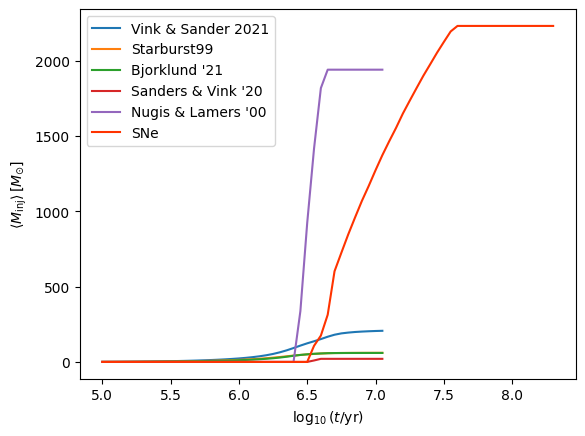

In [22]:
fig, axes = plt.subplots(1, 1)#, figsize=(3.37, 3.37*.8))
(ax1) = axes

plt.plot(ages, Minte4_VS21, label=r"Vink & Sander 2021")
plt.plot(ages, Minte4_sb99, label=r"Starburst99")
plt.plot(ages, Minte4_BJKD, label=r"Bjorklund '21")
plt.plot(ages, Minte4_SV20, label=r"Sanders & Vink '20")
plt.plot(ages, Minte4_NL00, label=r"Nugis & Lamers '00")
ax1.plot(age_arr[:-40],cumMSNe4[:-40],c=plt.cm.autumn(0.2),label=r"SNe")


#ax1.set_ylim(1e-3,3e1)
ax1.legend()
#ax1.set_xscale("log")
#ax1.set_yscale("log")
ax1.set_ylabel(r"$\left\langle{M}_{\rm inj}\right\rangle \, [M_{\odot}]$")
ax1.set_xlabel(r"$\log_{10}(t/{\rm yr})$")

Text(0.5, 0, '$\\log_{10}(t/{\\rm yr})$')

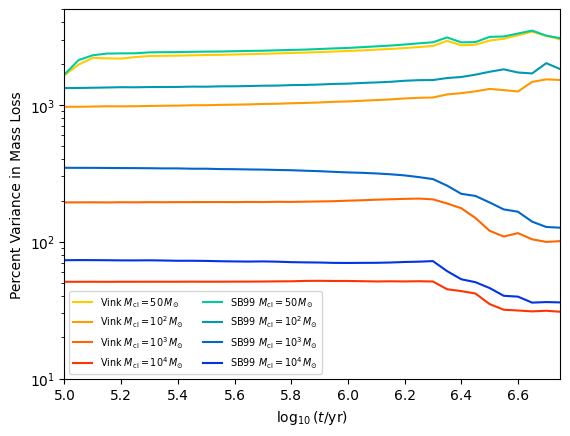

In [17]:
fig, axes = plt.subplots(1, 1)#, figsize=(3.37, 3.37*.8))
(ax1) = axes

ax1.plot(ages,1e2*(Mdot50_vink_75-Mdot50_vink_25)/Mdot50_vink,color=plt.cm.autumn(0.8),label=r"Vink $M_{\rm cl} = 50\, M_{\odot}$")
ax1.plot(ages,1e2*(Mdote2_vink_75-Mdote2_vink_25)/Mdote2_vink,color=plt.cm.autumn(0.6),label=r"Vink $M_{\rm cl} = 10^2\, M_{\odot}$")
ax1.plot(ages,1e2*(Mdote3_vink_75-Mdote3_vink_25)/Mdote3_vink,color=plt.cm.autumn(0.4),label=r"Vink $M_{\rm cl} = 10^3\, M_{\odot}$")
ax1.plot(ages,1e2*(Mdote4_vink_75-Mdote4_vink_25)/Mdote4_vink,color=plt.cm.autumn(0.2),label=r"Vink $M_{\rm cl} = 10^4\, M_{\odot}$")

ax1.plot(ages,1e2*(Mdot50_sb99_75-Mdot50_sb99_25)/Mdot50_sb99,color=plt.cm.winter(0.8),label=r"SB99 $M_{\rm cl} = 50\, M_{\odot}$")
ax1.plot(ages,1e2*(Mdote2_sb99_75-Mdote2_sb99_25)/Mdote2_sb99,color=plt.cm.winter(0.6),label=r"SB99 $M_{\rm cl} = 10^2\, M_{\odot}$")
ax1.plot(ages,1e2*(Mdote3_sb99_75-Mdote3_sb99_25)/Mdote3_sb99,color=plt.cm.winter(0.4),label=r"SB99 $M_{\rm cl} = 10^3\, M_{\odot}$")
ax1.plot(ages,1e2*(Mdote4_sb99_75-Mdote4_sb99_25)/Mdote4_sb99,color=plt.cm.winter(0.2),label=r"SB99 $M_{\rm cl} = 10^4\, M_{\odot}$")

ax1.set_yscale("log")
ax1.set_xlim(5,6.75)
ax1.set_ylim(1e1,5e3)
ax1.legend(ncols=2,fontsize="x-small")

ax1.set_ylabel(r"Percent Variance in Mass Loss")
ax1.set_xlabel(r"$\log_{10}(t/{\rm yr})$")